### **문제 정의** <지하철 혼잡도 분석>

In [6]:
#데이터 선택 필요한 Library 설치 및 Data [서울교통공사_지하철혼잡도정보](https://www.data.go.kr/data/15071311/fileData.do#tab-layer-file))불러들이기
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv("서울교통공사_지하철혼잡도정보_20230331.csv", encoding='EUC-KR')
df.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,8.2,18.9,19.8,35.7,...,19.4,18.6,18.4,15.0,17.4,18.9,15.2,13.1,7.3,1.1
1,2,평일,1,150,서울역,하선,11.1,10.7,15.7,23.5,...,39.6,37.0,42.5,36.5,41.0,29.1,18.4,16.2,5.5,0.0
2,3,평일,1,151,시청,상선,8.0,13.3,16.9,29.2,...,23.3,22.5,23.1,18.5,21.6,21.6,19.5,14.4,7.7,1.6
3,4,평일,1,151,시청,하선,9.1,9.9,17.7,22.7,...,34.1,33.6,39.1,30.2,35.1,24.5,15.8,14.1,4.1,0.4
4,5,평일,1,152,종각,상선,7.8,11.7,10.6,19.5,...,31.8,29.5,32.5,24.8,28.2,28.4,26.7,17.0,8.6,1.5


In [7]:
#DataFrame 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1641 non-null   int64  
 1   요일구분    1641 non-null   object 
 2   호선      1641 non-null   int64  
 3   역번호     1641 non-null   int64  
 4   출발역     1641 non-null   object 
 5   상하구분    1641 non-null   object 
 6   5시30분   1641 non-null   float64
 7   6시00분   1641 non-null   float64
 8   6시30분   1641 non-null   float64
 9   7시00분   1641 non-null   float64
 10  7시30분   1641 non-null   float64
 11  8시00분   1641 non-null   float64
 12  8시30분   1641 non-null   float64
 13  9시00분   1641 non-null   float64
 14  9시30분   1641 non-null   float64
 15  10시00분  1641 non-null   float64
 16  10시30분  1641 non-null   float64
 17  11시00분  1641 non-null   float64
 18  11시30분  1641 non-null   float64
 19  12시00분  1641 non-null   float64
 20  12시30분  1641 non-null   float64
 21  13시00분  1641 non-null   float64
 22  

In [8]:
# 데이터 전처리
# 필요한 열만 선택
data = df[['역번호','호선', '요일구분', '출발역', '상하구분', '5시30분', '6시00분', '6시30분', '7시00분',
             '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분',
             '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분',
             '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분',
             '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분',
             '21시30분', '22시00분', '22시30분', '23시00분', '23시30분', '00시00분', '00시30분']]


In [9]:
# Pivot을 통해 호선을 기준으로 데이터 재구성
pivoted_data_by_line = data.pivot_table(index='호선', values=data.columns[5:], aggfunc='mean')

In [10]:
# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivoted_data)

NameError: name 'pivoted_data' is not defined

In [ ]:
# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 결정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [ ]:
# 최적의 클러스터 수 결정 후 다시 클러스터링
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

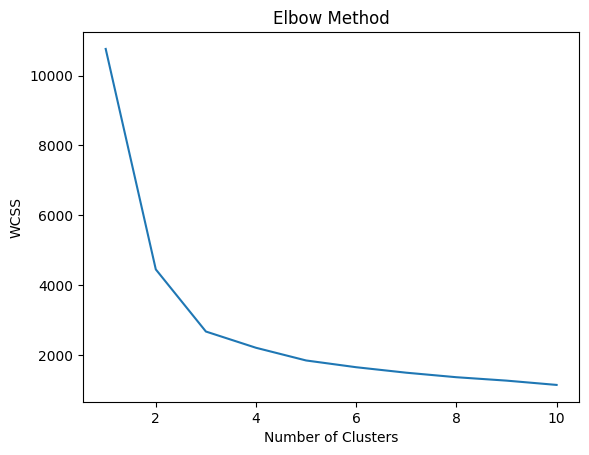

In [ ]:
# 결과 시각화
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

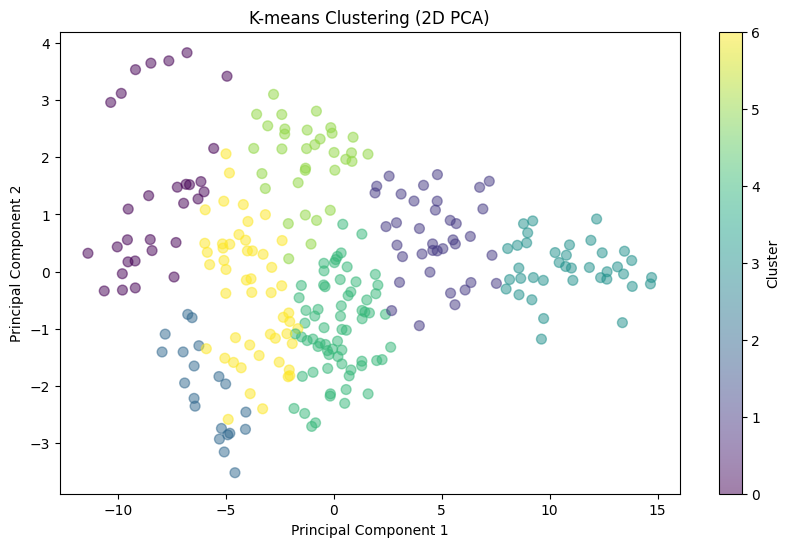

In [ ]:
# 클러스터링 결과 시각화 (2차원 산점도)
# PCA를 사용하여 데이터를 2차원으로 축소
from sklearn.decomposition import PCA

# PCA 모델을 초기화하고 적합
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# 클러스터 결과와 함께 2차원 공간에 산점도를 그립니다.
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
